# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
getTotal().tail(2) # last two dates data to check how recent this data is


,cases,deaths
date,,
2020-03-31,187962,3630
2020-04-01,214682,4551


In [5]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [6]:
def plotFitted(series, name="series", log=False): 
    print(f"Plotting {name}")
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=name)
    sbn.lineplot(x, base * np.exp(rate*x))

Plotting USA


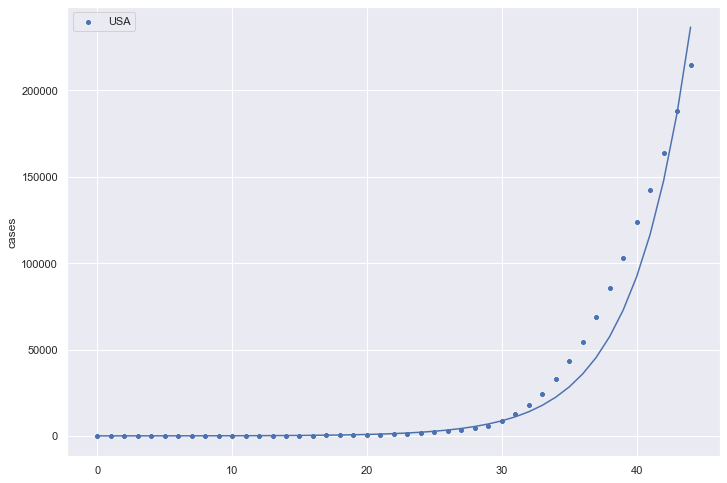

In [7]:
plotFitted(getTotal()["cases"][-45:], "USA")

In [8]:
def growthRateAnalysis(series, n=30):
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        "day to day growth rate (%)":rates, 
        "3 day moving average":rates.rolling(window=3).mean(), 
        "5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    sbn.lineplot(data=df)
    return df


,day to day growth rate (%),3 day moving average,5 day moving average
date,,,
2020-03-28,16.892378,17.790067,18.861197
2020-03-29,12.904247,15.534999,17.493930
2020-03-30,13.136608,14.311077,15.882211
2020-03-31,12.918569,12.986474,14.532035
2020-04-01,12.446316,12.833831,13.659623


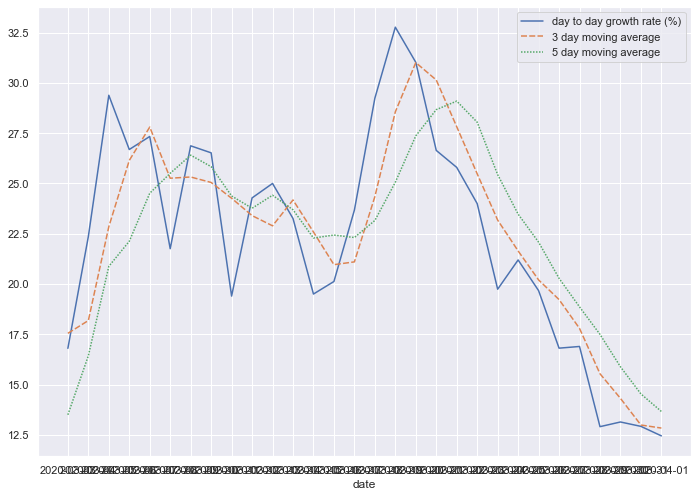

In [9]:
growthRateAnalysis(getTotal()['cases']).tail(5)

In [10]:
def analyse(counties=[], states=[], n=20, col="cases"):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c)[col] for c in counties] + [getState(s)[col] for s in states] + [getTotal()[col]] 
    for d, name in zip(dfs, names):
        print(f"Analysis for {name}")
        rate, base, n = fitExponential(d[-n:])
        rates.append(rate)
        print(f"exponential fitted with {n} points {col} = {np.round(base, 2)} * exp ({np.round(rate, 4)} * day)")
        print(f"fitted day to day growth rate: {np.round(100 * (np.exp(rate) - 1), 2)}%")
        print(f"fitted days to doubling: {np.round(np.log(2)/rate, 2)}")
        growthRate = growthRateAnalysis(d, n).tail(1)
        gr = growthRate["5 day moving average"].values[0]
        print(f"current actual day to day growth rate: {np.round(gr, 2)}%")
        print(f"current actual days to doubling: {np.round(np.log(2)*100/gr, 2)}")
        plt.show()

    
    

Analysis for San Francisco
exponential fitted with 20 points cases = 26.44 * exp (0.1572 * day)
fitted day to day growth rate: 17.03%
fitted days to doubling: 4.41
current actual day to day growth rate: 8.38%
current actual days to doubling: 8.27


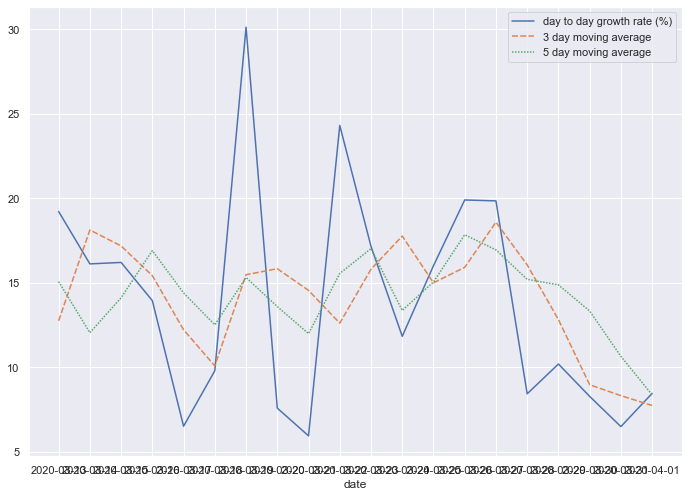

Analysis for Boulder
exponential fitted with 19 points cases = 4.18 * exp (0.2131 * day)
fitted day to day growth rate: 23.75%
fitted days to doubling: 3.25
current actual day to day growth rate: 7.77%
current actual days to doubling: 8.92


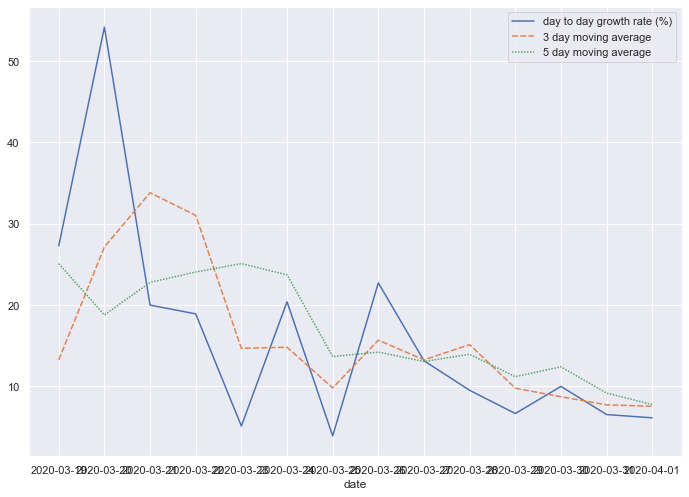

Analysis for Denver
exponential fitted with 19 points cases = 23.7 * exp (0.1908 * day)
fitted day to day growth rate: 21.03%
fitted days to doubling: 3.63
current actual day to day growth rate: 11.81%
current actual days to doubling: 5.87


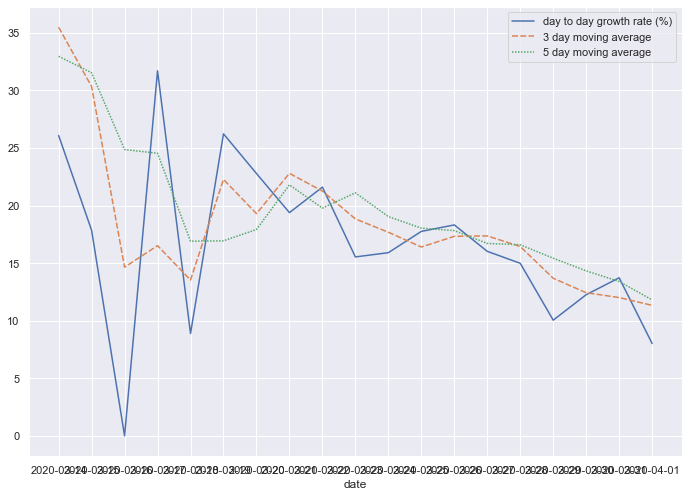

Analysis for New York City
exponential fitted with 19 points cases = 430.52 * exp (0.3034 * day)
fitted day to day growth rate: 35.45%
fitted days to doubling: 2.28
current actual day to day growth rate: 11.69%
current actual days to doubling: 5.93


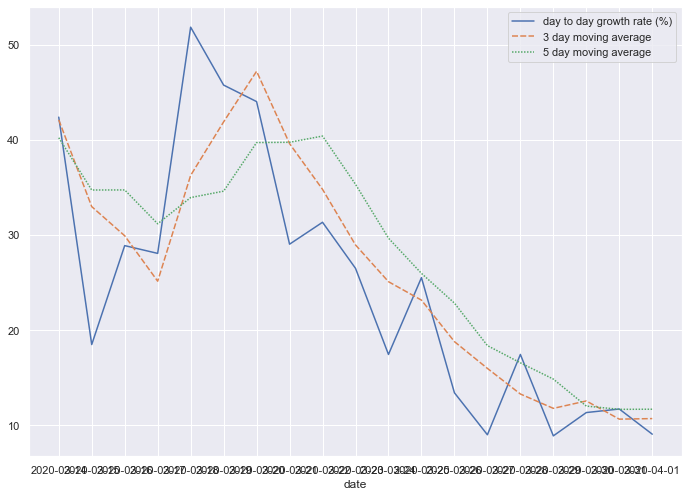

Analysis for California
exponential fitted with 19 points cases = 420.99 * exp (0.1817 * day)
fitted day to day growth rate: 19.93%
fitted days to doubling: 3.81
current actual day to day growth rate: 12.98%
current actual days to doubling: 5.34


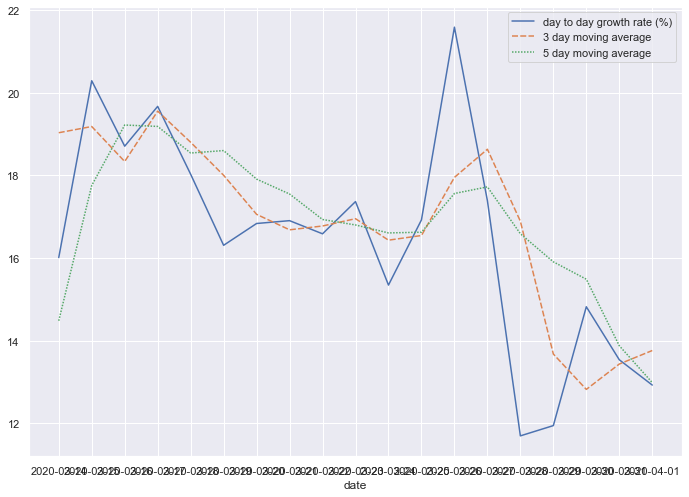

Analysis for Colorado
exponential fitted with 19 points cases = 108.6 * exp (0.203 * day)
fitted day to day growth rate: 22.51%
fitted days to doubling: 3.41
current actual day to day growth rate: 12.31%
current actual days to doubling: 5.63


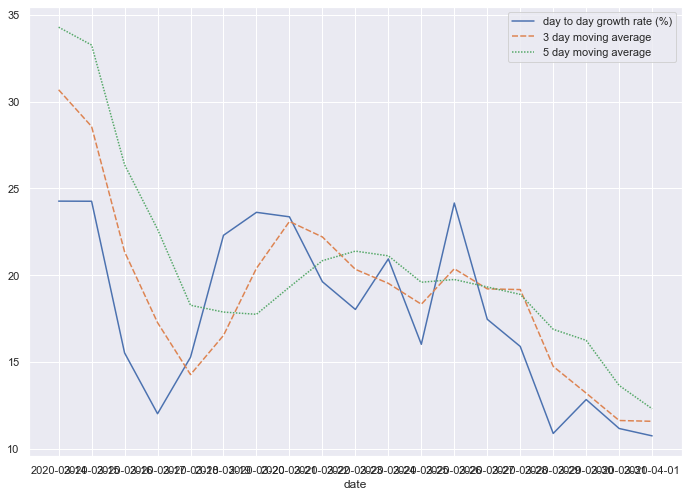

Analysis for Arizona
exponential fitted with 19 points cases = 11.5 * exp (0.2958 * day)
fitted day to day growth rate: 34.42%
fitted days to doubling: 2.34
current actual day to day growth rate: 13.88%
current actual days to doubling: 5.0


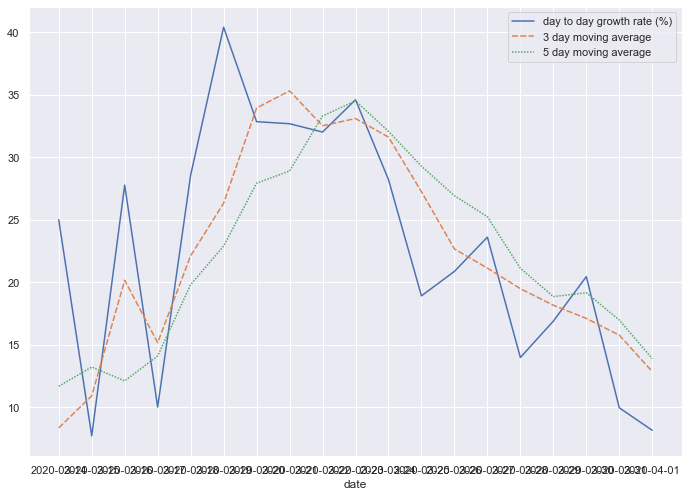

Analysis for USA total:
exponential fitted with 19 points cases = 3403.85 * exp (0.2523 * day)
fitted day to day growth rate: 28.7%
fitted days to doubling: 2.75
current actual day to day growth rate: 13.66%
current actual days to doubling: 5.07


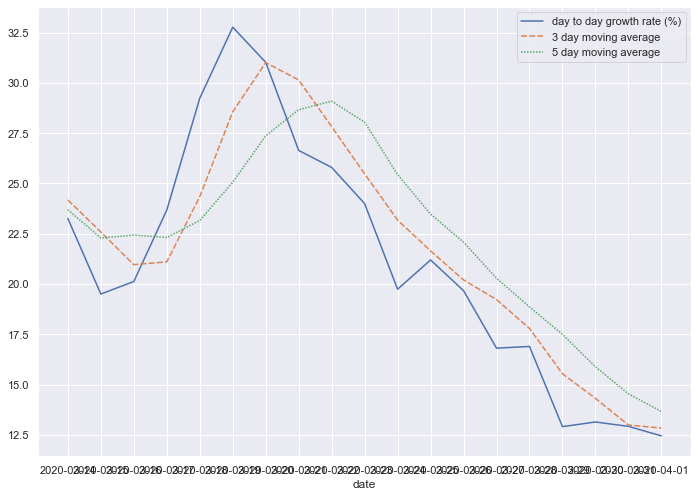

In [11]:
counties =["San Francisco", "Boulder", "Denver", "New York City"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)

Analysis for San Francisco
exponential fitted with 8 points deaths = 1.49 * exp (0.255 * day)
fitted day to day growth rate: 29.04%
fitted days to doubling: 2.72
current actual day to day growth rate: 15.19%
current actual days to doubling: 4.56


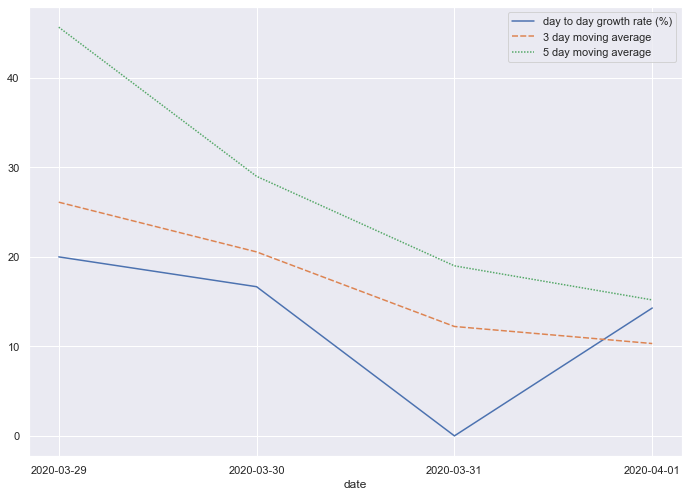

Analysis for Boulder
exponential fitted with 6 points deaths = 0.85 * exp (0.1584 * day)
fitted day to day growth rate: 17.17%
fitted days to doubling: 4.38
current actual day to day growth rate: 10.0%
current actual days to doubling: 6.93


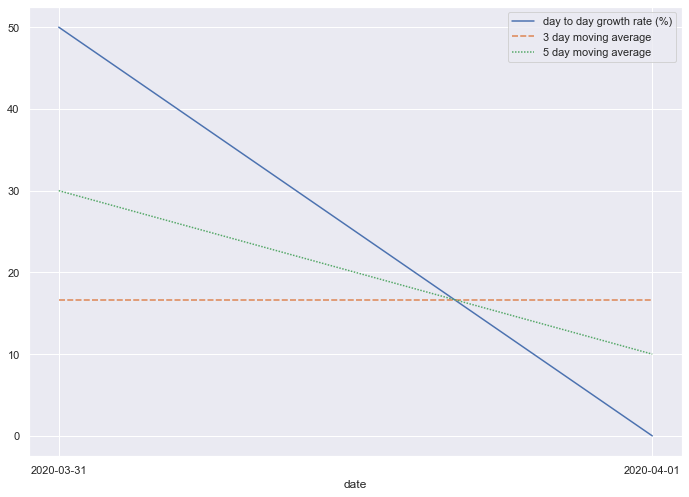

Analysis for Denver
exponential fitted with 6 points deaths = 3.5 * exp (0.1742 * day)
fitted day to day growth rate: 19.03%
fitted days to doubling: 3.98
current actual day to day growth rate: 16.69%
current actual days to doubling: 4.15


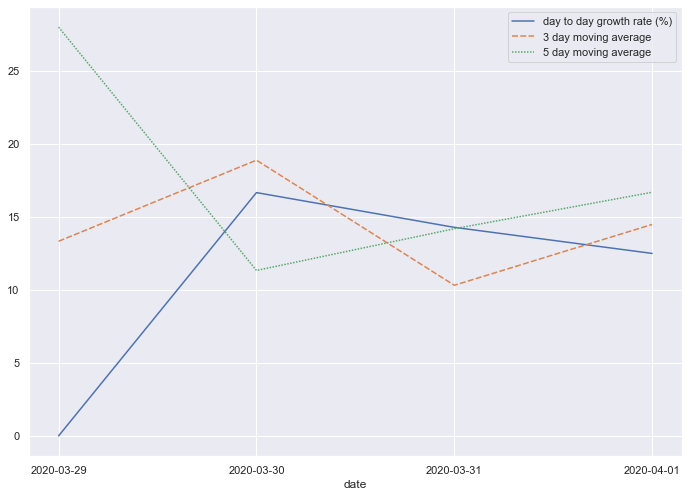

Analysis for New York City
exponential fitted with 6 points deaths = 494.84 * exp (0.2061 * day)
fitted day to day growth rate: 22.88%
fitted days to doubling: 3.36
current actual day to day growth rate: 19.67%
current actual days to doubling: 3.52


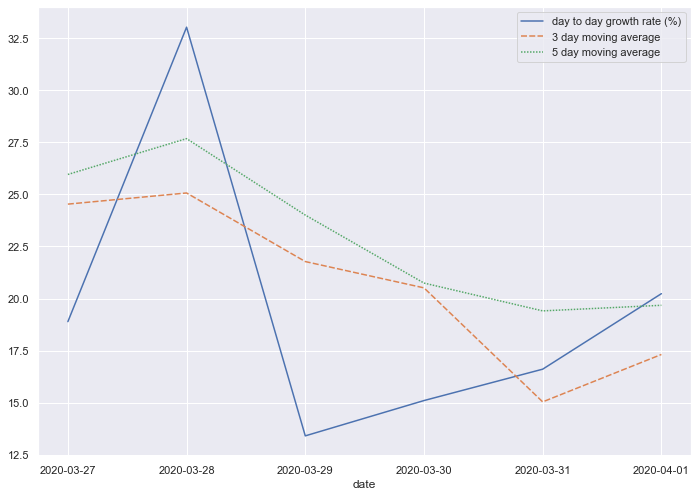

Analysis for California
exponential fitted with 6 points deaths = 102.73 * exp (0.14 * day)
fitted day to day growth rate: 15.03%
fitted days to doubling: 4.95
current actual day to day growth rate: 13.17%
current actual days to doubling: 5.26


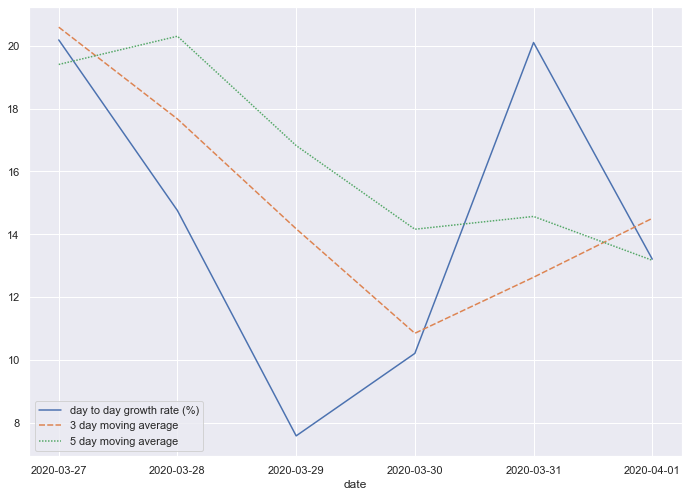

Analysis for Colorado
exponential fitted with 6 points deaths = 31.99 * exp (0.18 * day)
fitted day to day growth rate: 19.72%
fitted days to doubling: 3.85
current actual day to day growth rate: 17.03%
current actual days to doubling: 4.07


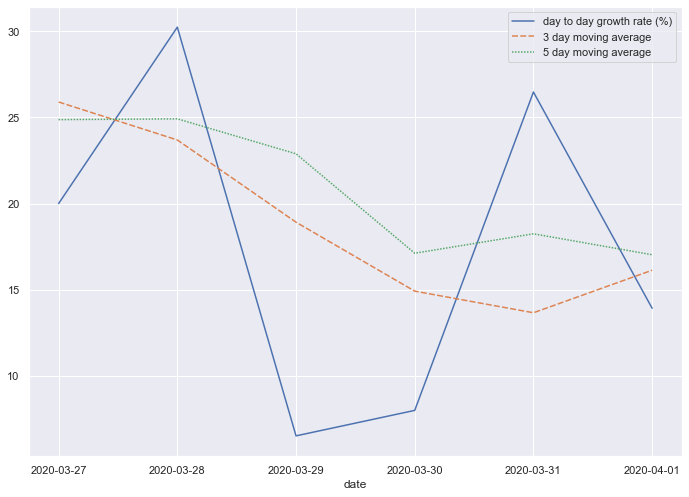

Analysis for Arizona
exponential fitted with 6 points deaths = 10.48 * exp (0.1243 * day)
fitted day to day growth rate: 13.24%
fitted days to doubling: 5.57
current actual day to day growth rate: 11.97%
current actual days to doubling: 5.79


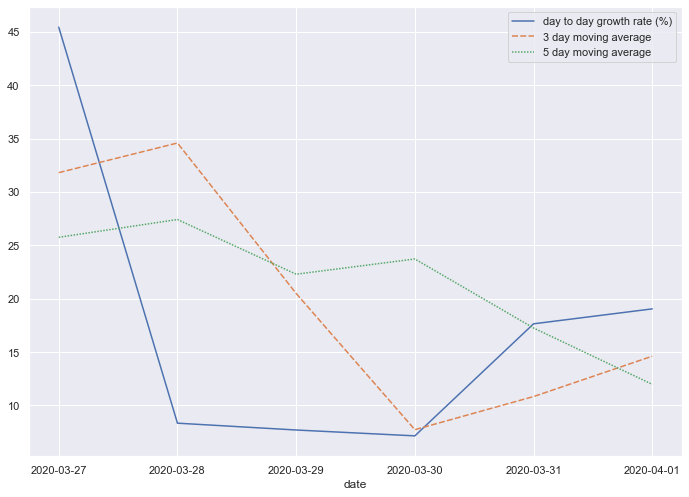

Analysis for USA total:
exponential fitted with 6 points deaths = 1671.96 * exp (0.1954 * day)
fitted day to day growth rate: 21.58%
fitted days to doubling: 3.55
current actual day to day growth rate: 18.25%
current actual days to doubling: 3.8


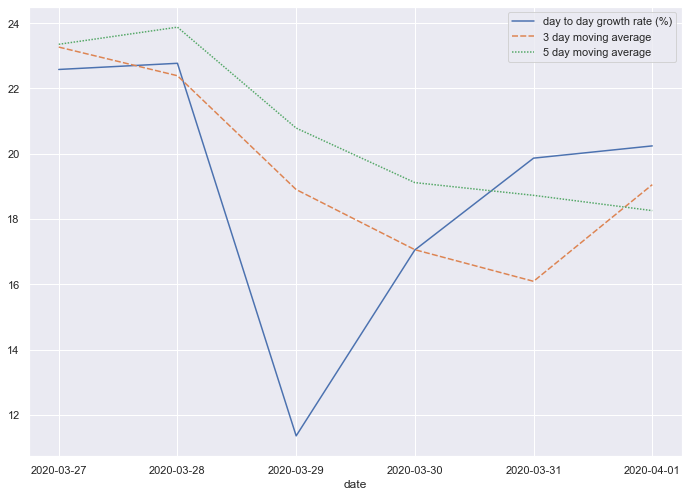

In [12]:
analyse(counties=counties, states=states, col="deaths")

In [13]:
# counties with the most deaths today
today = rawData.tail(1).date.values[0]
rawData[rawData.date == today].groupby(['state', 'county']).sum().sort_values('deaths', ascending=False)

,,fips,cases,deaths
state,county,,,
New York,New York City,0.0,47440,1374
Washington,King,53033.0,2498,166
Michigan,Wayne,26163.0,4470,146
Louisiana,Orleans,22071.0,2270,115
Michigan,Oakland,26125.0,1910,99
Illinois,Cook,17031.0,5152,95
New York,Nassau,36059.0,9555,76
New Jersey,Bergen,34003.0,3494,75
New York,Suffolk,36103.0,7605,69


In [14]:
# counties with the most cases today
rawData[rawData.date == today].groupby(['state', 'county']).sum().sort_values('deaths', ascending=False)

,,fips,cases,deaths
state,county,,,
New York,New York City,0.0,47440,1374
Washington,King,53033.0,2498,166
Michigan,Wayne,26163.0,4470,146
Louisiana,Orleans,22071.0,2270,115
Michigan,Oakland,26125.0,1910,99
Illinois,Cook,17031.0,5152,95
New York,Nassau,36059.0,9555,76
New Jersey,Bergen,34003.0,3494,75
New York,Suffolk,36103.0,7605,69
